# Implementing KNN Algorithm manually

#### Load necessary libraries

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

### Load the Iris Dataset

In [392]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Find out the different species in the dataset

In [393]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [394]:
## Adding column Target for getting target values of dataset

data.loc[data['Species'] == 'Iris-setosa', 'Target'] = 1
data.loc[data['Species'] == 'Iris-versicolor', 'Target'] = 2
data.loc[data['Species'] == 'Iris-virginica', 'Target'] = 3

### Shuffle and Split the dataset into Training and Testing

In [395]:
# shuffle the dataset
shuffled_data = data.sample(frac = 1)

# 80% data is for training, rest if for testing
train_size = int(0.8 * len(shuffled_data))
test_size = len(shuffled_data) - train_size

# split into training and testing dataset
train = shuffled_data[:train_size]
test = shuffled_data[train_size:]

In [396]:
# get the x and y values for training
x_train, y_train = train.iloc[:, 1:5], train['Target'].astype(int)
print(x_train)

# get the x and y values for testing
x_test, y_test = test.iloc[:, 1:5], test['Target'].astype(int)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
140            6.7           3.1            5.6           2.4
105            7.6           3.0            6.6           2.1
35             5.0           3.2            1.2           0.2
5              5.4           3.9            1.7           0.4
65             6.7           3.1            4.4           1.4
..             ...           ...            ...           ...
148            6.2           3.4            5.4           2.3
106            4.9           2.5            4.5           1.7
111            6.4           2.7            5.3           1.9
117            7.7           3.8            6.7           2.2
86             6.7           3.1            4.7           1.5

[120 rows x 4 columns]


### Plot the dataset for better visualization

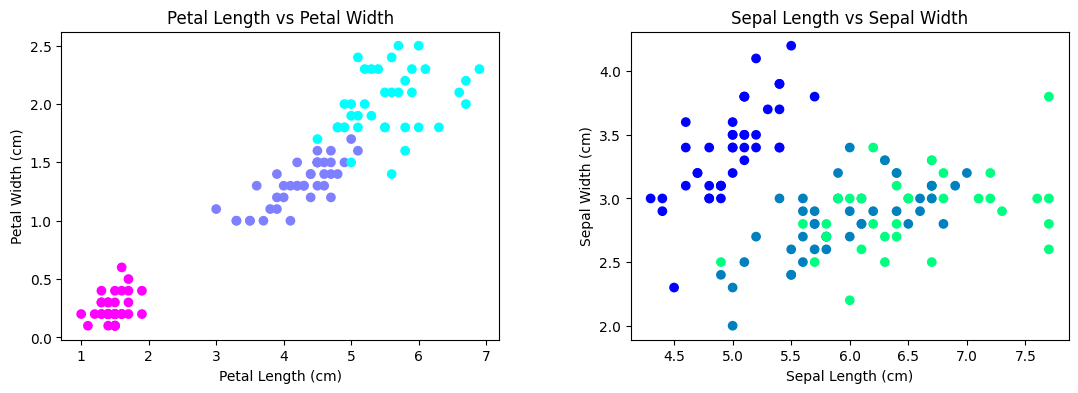

In [397]:
# make two subplots
fig, [fig1, fig2] = plt.subplots(1, 2, figsize = (13, 4))
plt.subplots_adjust(wspace = 0.3)

fig1.set_title('Petal Length vs Petal Width')
fig1.set_xlabel('Petal Length (cm)')
fig1.set_ylabel('Petal Width (cm)')

# plot petal length vs petal width
fig1.scatter(x_train.iloc[:, 2], x_train.iloc[:, 3], c = y_train, cmap = 'cool_r')

fig2.set_title('Sepal Length vs Sepal Width')
fig2.set_xlabel('Sepal Length (cm)')
fig2.set_ylabel('Sepal Width (cm)')

# plot sepal length vs sepal width
fig2.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c = y_train, cmap = 'winter')


plt.show()

As we can see, ***clusters are more prominent in Petal Length vs Petal Width graph***. Therefore, we will be using those features for our classification using the KNN algorithm.

### Define the different distance formulas

In [398]:
def eucledian_distance(x1, x2):
    d = np.sqrt(np.sum((x1 - x2) ** 2))
    return d

def manhattan_distance(x1, x2):
    d = np.sum(x1 - x2)
    return d

### Create a Prediction function which uses KNN algorithm

In [399]:
def predict(x, k = 5, distance_function = eucledian_distance):
    distances = []
    nearest_labels = []
    x = x[2:]

    # find out the distance between each point in petal length and width graph
    for x1 in x_train.values[:, 2:]:
        distances.append(distance_function(x, x1))

    # find the nearest neighbours of the points (smallest distance)
    nearest_indices = np.argsort(distances)[:k]
    
    # find out the corresponding labels for nearest neighbours
    for i in nearest_indices:
        nearest_labels.append(y_train.iloc[i])
    
    # return the most common neighbour from k nearest neighbours
    return mode(nearest_labels)

## Eucledian Distance

#### Make predictions for different test values

In [410]:
# find out the predicted value for each data point using Eucledian Distance formula with k = 5
y_prediction = [predict(x, k = 5, distance_function = eucledian_distance) for x in x_test.values]


# find out the accuracy of the predictions
accuracy = (np.sum(y_prediction == y_test) / test_size) * 100
correct = y_prediction == y_test

print('Accuracy =', np.round(accuracy, 2), '%')

Accuracy = 96.67 %


#### Plot the graph for prediction visualization

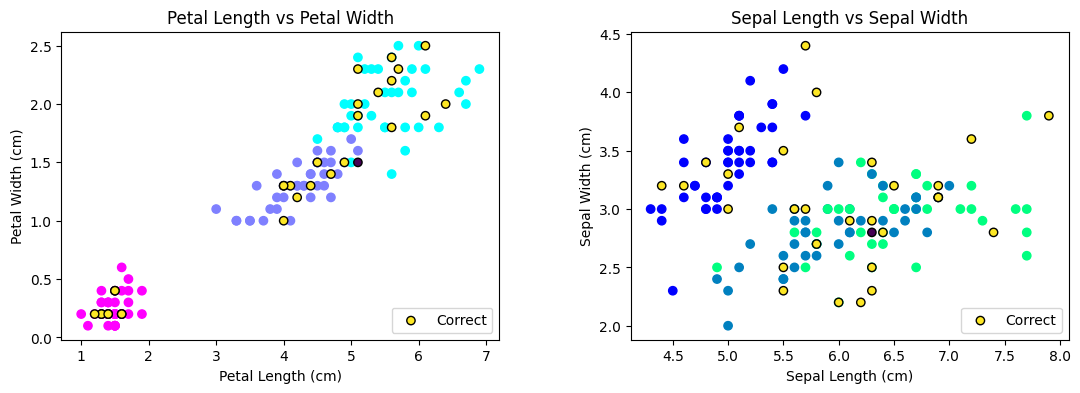

In [407]:
# make two subplots
fig, [fig1, fig2] = plt.subplots(1, 2, figsize = (13, 4))
plt.subplots_adjust(wspace = 0.3)

fig1.set_title('Petal Length vs Petal Width')
fig1.set_xlabel('Petal Length (cm)')
fig1.set_ylabel('Petal Width (cm)')

# plot petal length vs petal width
fig1.scatter(x_train.iloc[:, 2], x_train.iloc[:, 3], c = y_train, cmap = 'cool_r')
fig1.scatter(x_test.iloc[:, 2], x_test.iloc[:, 3], c = correct, cmap = 'viridis', edgecolors = 'black', label = 'Correct')

fig2.set_title('Sepal Length vs Sepal Width')
fig2.set_xlabel('Sepal Length (cm)')
fig2.set_ylabel('Sepal Width (cm)')

# plot sepal length vs sepal width
fig2.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c = y_train, cmap = 'winter')
fig2.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = correct, cmap = 'viridis', edgecolors = 'black', label = 'Correct')

fig1.legend(loc = 'lower right')
fig2.legend(loc = 'lower right')
plt.show()

## Manhattan Distance

#### Make predictions for different test values

In [412]:
# find out the predicted value for each data point using Manhattan Distance formula and k = 10
y_prediction = [predict(x, k = 10, distance_function = manhattan_distance) for x in x_test.values]


# find out the accuracy of the predictions
accuracy = (np.sum(y_prediction == y_test) / test_size) * 100
correct = y_prediction == y_test

print('Accuracy =', np.round(accuracy, 2), '%')

Accuracy = 40.0 %


#### Plot the graph for prediction visualization

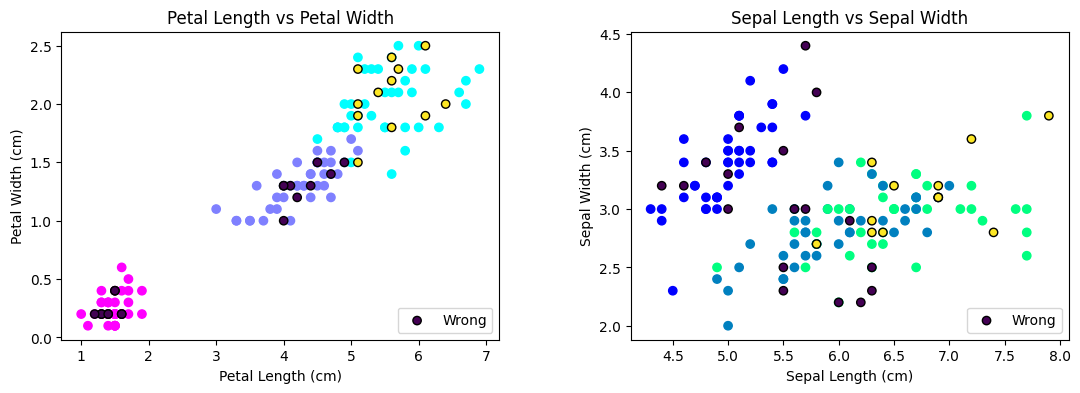

In [413]:
# make two subplots
fig, [fig1, fig2] = plt.subplots(1, 2, figsize = (13, 4))
plt.subplots_adjust(wspace = 0.3)

fig1.set_title('Petal Length vs Petal Width')
fig1.set_xlabel('Petal Length (cm)')
fig1.set_ylabel('Petal Width (cm)')

# plot petal length vs petal width
fig1.scatter(x_train.iloc[:, 2], x_train.iloc[:, 3], c = y_train, cmap = 'cool_r')
fig1.scatter(x_test.iloc[:, 2], x_test.iloc[:, 3], c = correct, cmap = 'viridis', edgecolors = 'black', label = 'Wrong')

fig2.set_title('Sepal Length vs Sepal Width')
fig2.set_xlabel('Sepal Length (cm)')
fig2.set_ylabel('Sepal Width (cm)')

# plot sepal length vs sepal width
fig2.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c = y_train, cmap = 'winter')
fig2.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = correct, cmap = 'viridis', edgecolors = 'black', label = 'Wrong')

fig1.legend(loc = 'lower right')
fig2.legend(loc = 'lower right')
plt.show()

### Best Results obtained using the Eucledian Distance formula with accuracy of 96.67%

<p> </p>

# Implementing KNN Algorithm using sklearn library

#### Load the necessary libraries

In [416]:
from sklearn.neighbors import KNeighborsClassifier

The required datasets for training and testing are already present as use have used them above. We can use them here as well

### Create the classifier and input the training dataset

In [433]:
# use k = 5 for KNN algorithm
knn = KNeighborsClassifier(n_neighbors = 3)

# inputting the training dataset into the classifer
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make predictions for different test values

In [435]:
# use the predict function to find the predicted values
y_pred = knn.predict(x_test)


# find accuracy of the predictions
accuracy = (np.sum(y_pred == y_test) / test_size) * 100

print('Accuracy =', np.round(accuracy, 2), '%')

Accuracy = 96.67 %


### Sklearn library KNN Classifier also gives us an accuracy of 96.67%